# Random walks model

- Random walk에서 현재 시점의 값은 : 이전 시점의 값에 random deviation을 더한 값 
  - random deviation(white noise;residual; 잔차; Z) 만큼 변화 
$$X_t = X_{t-1} + Z_t$$
- Random walk에서 현재 시점의 값은 : 첫 시점의 값에 첫 시점부터 현재 시점까지의 random deviation들을 모두 더한 값 
$$X_t=X_1+ \sum_{i=1}^{t}Z_i$$
- $Z_t$는 서로 독립이고, 정규분포를 따름


In [ ]:
x=NULL #변수생성
x[1]=0 #첫번째원소 0

# 두번째부터 1000번째 원소까지는 직전값에 정규분포 내 랜덤값 더하기
for (i in 2:1000){ 
  x[i]=x[i-1]+rnorm(1)
}

print(x)

   [1]   0.000000000  -0.803826360  -1.086828809  -0.895539927  -0.023381269
   [6]   0.530329091   1.871484983   2.142775799   3.305298368   3.385239062
  [11]   2.584470622   3.362791280   5.305182460   6.167578256   5.930324297
  [16]   6.018116243   5.023727076   6.804366260   6.358313645   6.719266392
  [21]   7.510552952   7.819212371   7.610012914   7.522761776   6.338950327
  [26]   5.053575845   3.551331576   3.272757033   4.037585498   3.472445216
  [31]   2.268589543   2.046445028   1.715986475   0.203629605  -0.983506869
  [36]  -1.965111613  -1.279339383  -1.103383812  -0.726592146  -1.733630309
  [41]  -1.600917854  -0.746685265  -2.844707869  -2.362344244  -2.806419157
  [46]  -3.267811922  -2.149397684  -0.900172482  -0.819745142  -0.355444674
  [51]  -0.498313590  -1.371159879  -1.640677418  -1.879784815  -2.666713744
  [56]  -5.455757459  -4.164677133  -4.261136869  -3.638173304  -3.901015480
  [61]  -5.611225105  -4.912554298  -4.833878013  -5.777033158  -5.235245716

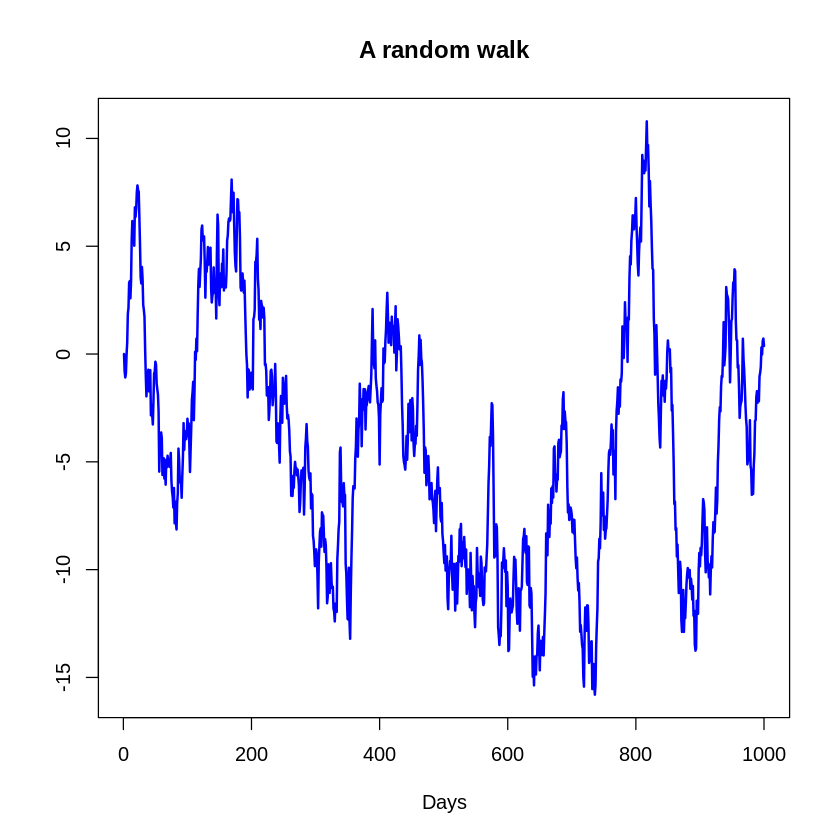

In [ ]:
random_walk=ts(x) # 시계열 데이터로 변수 저장
plot(random_walk, main='A random walk', ylab=' ', xlab='Days', col='blue', lwd=2) # lwd=linewidth

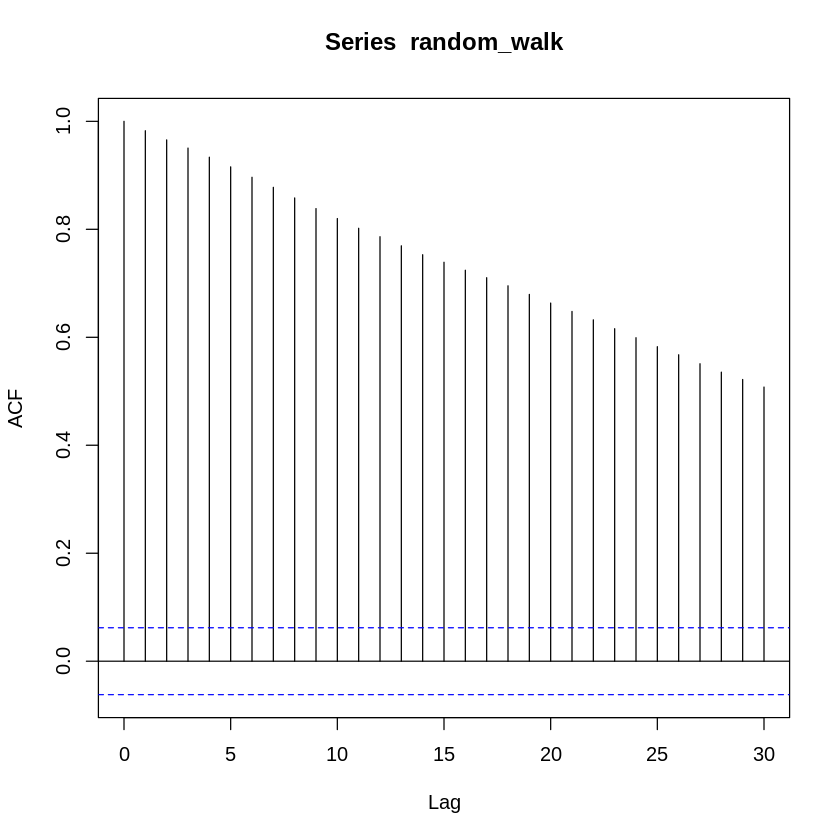

In [ ]:
acf(random_walk)

- 시계열 plot에서도 추세가 보이고
- timestep 30에서도 높은 값의 autocorrelation coefficient를 보임 <br>
=> non-stationarity <br>
!점선은 신뢰구간!


## purely random walk
- random walk 에서 stationary stochastic process를 얻기 위해서는 diff() 함수 통해서 trend 제거 (잔차만 도출)
$$Z_t=X_t-X_{t-1}$$


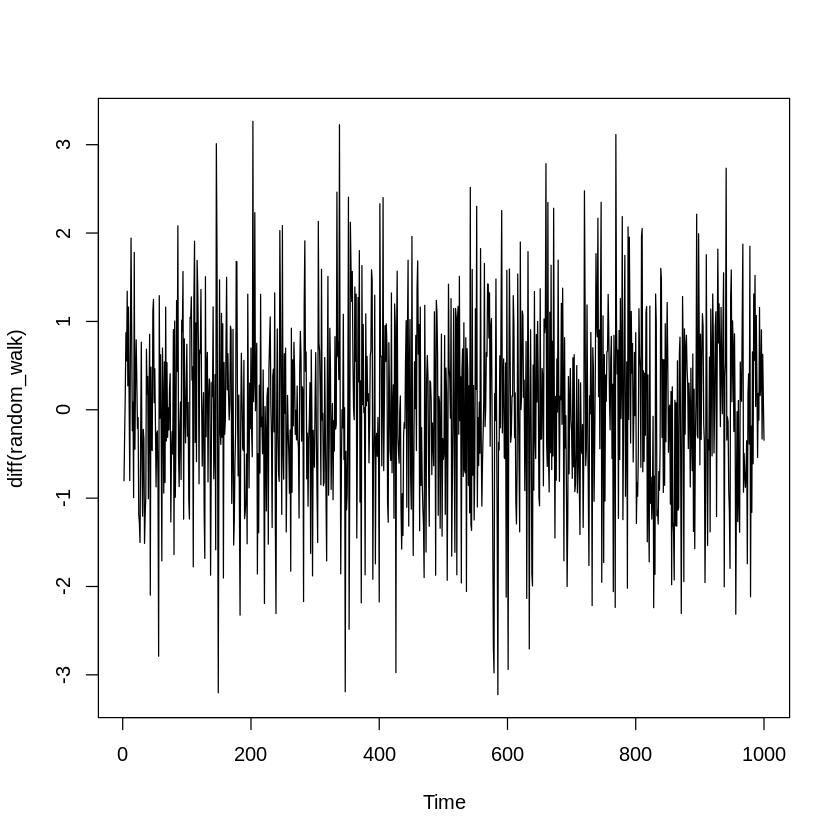

In [ ]:
plot(diff(random_walk)) # 잔차(x_t - x_{t-1})만을 나타내는 그래프 - purely random walk

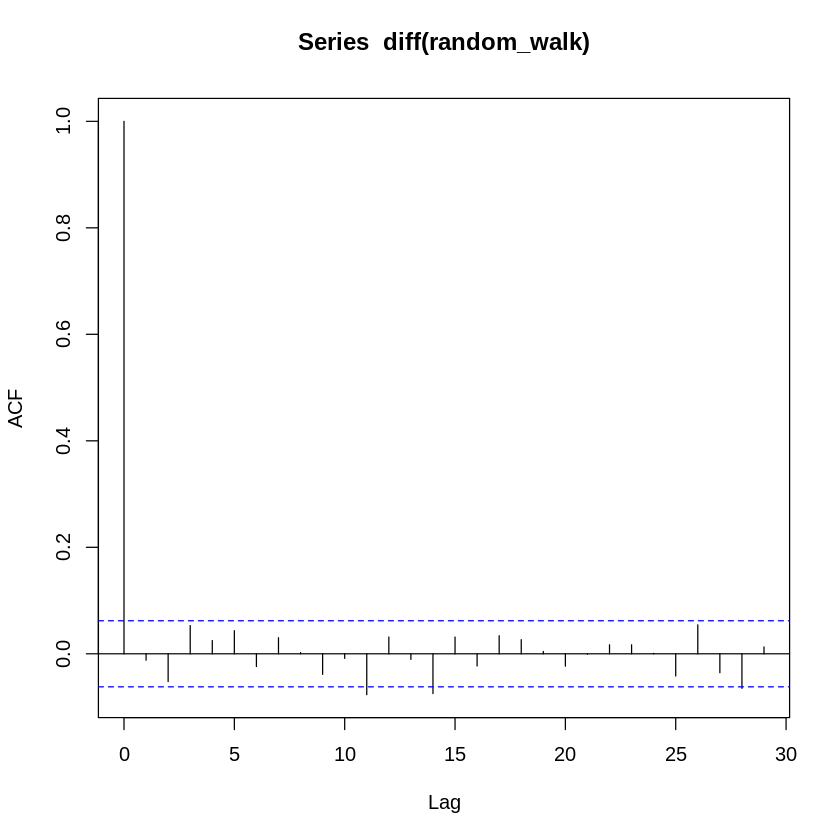

In [ ]:
acf(diff(random_walk))

- 시계열 plot에서 추세를 찾을 수 없고 
- 자기상관계수 역시 timestep 0 이후 0에 수렴 <br>
=> staionary

# Moving averages 
- 개념이해: 주식을 예로 들었을 때, 주가 자체의 AR 움직임에 더해 회사의 공시, 뉴스와 같은 정보가 주가에 영향을 미칠 수 있음. 이때 공시, 뉴스와 같은 정보가 바로 white noise(Z)임. <br> 이런 공시가 당일에만 영향을 주는 것이 아니라 내일, 그리고 모레까지도 영향을 줄 수 있다고 가정하고 모델에 반영하는 것이 MA! 
- MA(q) 모델 : 현재 시점의 값은 현재 시점과 과거의 noise들의 선형 결합 
  - timestep q 기간동안 Z가 영향을 주는 모델
$$X_t=Z_t+\theta_1 Z_{t-1} + \theta_2 Z_{t-2}+ ... + \theta_q Z_{t-q}$$
e.g.) MA(2) : timestep 2 기간동안 Z가 영향을 주는 모델 =>
$X_t=Z_t+\theta_1 Z_{t-1} + \theta_2 Z_{t-2}$
- $Z_i$는 서로 독립이며, 정규분포를 따름
- 과거 noise 영향을 받기 때문에 ACF 값이 크다가 차수(q) 시점 즉, lag q에서 0이 됨


noise 생성 

In [1]:
noise=rnorm(10000)

변수 생성

In [2]:
ma_2=NULL

반복문 사용하여 MA(2) process 생성
- $X_t=Z_t+0.7 Z_{t-1} + 0.2Z_{t-2}$

In [4]:
for(i in 3:10000){ # 처음 2개 데이터는 세번째 데이터 생성을 위해 사용되므로 세번째부터 시작
  ma_2[i]=noise[i]+0.7*noise[i-1]+0.2*noise[i-2]
  }

q=2 적용하여 첫번째, 두번째 변수는 값이 없기 때문에 2개 데이터 shift

In [5]:
moving_average_process=ma_2[3:10000]

time series 데이터로 변환

In [6]:
moving_average_process=ts(moving_average_process)

2행 1열로 partition 나눈 multi frame 그래프 출력
- 1행 : moving_average_process 시각화
- 2행 : acf corellogram

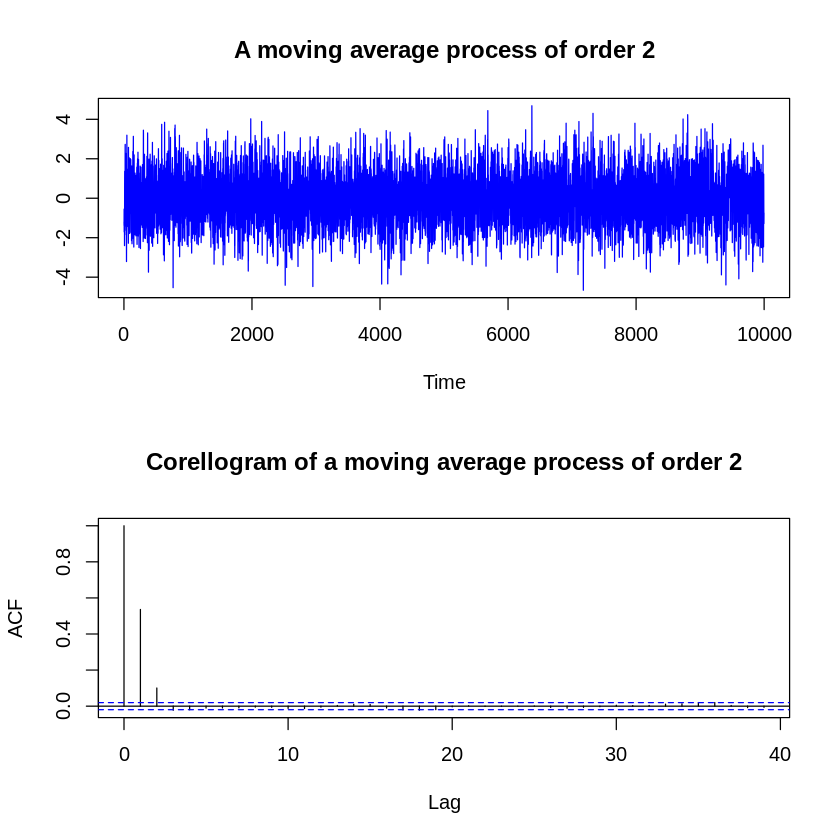

In [7]:
par(mfrow=c(2,1))

plot(moving_average_process, main='A moving average process of order 2', ylab=' ', col='blue')
acf(moving_average_process, main='Corellogram of a moving average process of order 2')